# **Motivation:**

* Many statistical and machine learning algorithms cannot handle missing values directly. It is necessary to handle missing values appropriately before applying these techniques to ensure compatibility and accurate results.

* Missing values can create gaps in the dataset.

* Ignoring missing values or using incomplete data for analysis can lead to erroneous conclusions. 

Let's check the missing values in each feature at first.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [52]:
df = pd.read_csv('/content/sample_data/Ames_without_outliers.csv')
df.head()

,Unnamed: 0,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


NaN values are missing values.

In [53]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0].sort_values(ascending=False))

Pool QC           2914
Misc Feature      2821
Alley             2728
Fence             2354
Fireplace Qu      1422
Lot Frontage       489
Garage Cond        159
Garage Qual        159
Garage Finish      159
Garage Yr Blt      159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
BsmtFin Type 1      80
Bsmt Qual           80
Bsmt Cond           80
Mas Vnr Area        23
Mas Vnr Type        23
Bsmt Half Bath       2
Bsmt Full Bath       2
Total Bsmt SF        1
Bsmt Unf SF          1
Garage Cars          1
Garage Area          1
BsmtFin SF 2         1
BsmtFin SF 1         1
Electrical           1
dtype: int64


Ugh. Its too much missing data. 

It shows the most missing values are in Pool QC feature. Let's make a function that will help us to check missing values in each feature and confirm the missing values.

In [54]:
def percent_missing(df):
  percent_nan = 100 * df.isnull().sum() / len(df)
  percent_nan = percent_nan[percent_nan>0].sort_values(ascending = False)
  return percent_nan

In [55]:
percent_of_nan_in_each_feature = percent_missing(df)

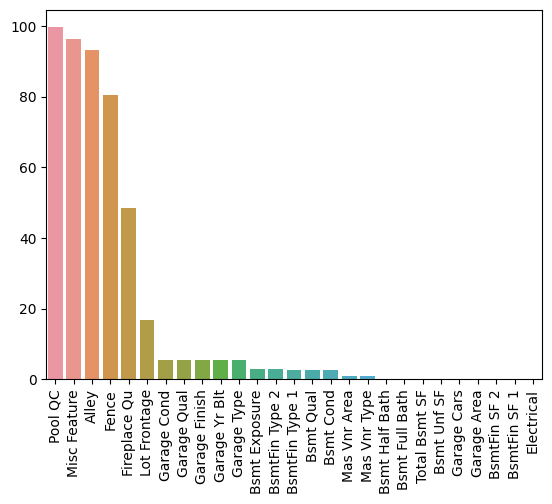

In [56]:
sns.barplot(x = percent_of_nan_in_each_feature.index, y=percent_of_nan_in_each_feature)
plt.xticks(rotation=90);

Look! Again the highest number of missing values are in Pool QC.

# **Filling Missing Values WITH LESS MISSING VALUES:**

* Let's start from the featuers that have low missing values and then we will move towards features with high missing values.

* In above barplot, we can see that features from Bsmt Half Bath are having very low missing values. Let's view them more closely.


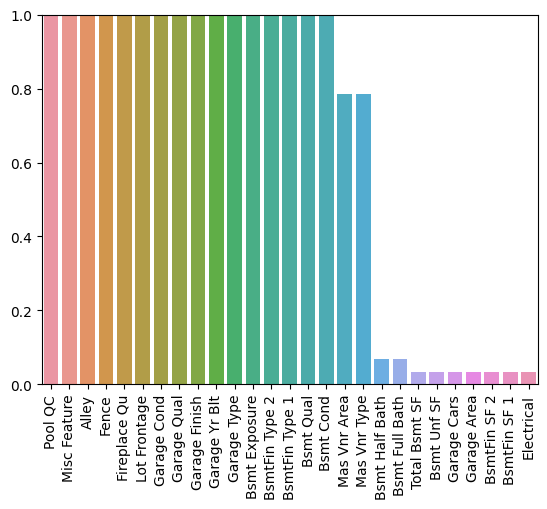

In [57]:
sns.barplot(x = percent_of_nan_in_each_feature.index, y=percent_of_nan_in_each_feature)
plt.xticks(rotation=90);
plt.ylim(0,1);

Now its more clear.

Let's first handle the rows with missing values less than 1%. 

In [58]:
percent_of_nan_in_each_feature[percent_of_nan_in_each_feature<1].sort_values(ascending=False)

Mas Vnr Area      0.786056
Mas Vnr Type      0.786056
Bsmt Half Bath    0.068353
Bsmt Full Bath    0.068353
Total Bsmt SF     0.034176
Bsmt Unf SF       0.034176
Garage Cars       0.034176
Garage Area       0.034176
BsmtFin SF 2      0.034176
BsmtFin SF 1      0.034176
Electrical        0.034176
dtype: float64

In [59]:
df[df['Electrical'].isnull()]

,Unnamed: 0,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1575,1577,1578,916386080,80,RL,73.0,9735,Pave,NaN,Reg,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,167500


Only one row with missing data for Electrical Feature.

Let's drop it.

In [60]:
df = df.dropna(subset=['Electrical'])

In [62]:
df[df['BsmtFin SF 1'].isnull()]

,Unnamed: 0,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1340,1341,1342,903230120,20,RM,99.0,5940,Pave,NaN,IR1,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [63]:
df[df['BsmtFin SF 2'].isnull()]

,Unnamed: 0,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1340,1341,1342,903230120,20,RM,99.0,5940,Pave,NaN,IR1,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [64]:
df[df['Bsmt Unf SF'].isnull()]

,Unnamed: 0,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1340,1341,1342,903230120,20,RM,99.0,5940,Pave,NaN,IR1,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [65]:
df[df['Total Bsmt SF'].isnull()]

,Unnamed: 0,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1340,1341,1342,903230120,20,RM,99.0,5940,Pave,NaN,IR1,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [66]:
df[df['Bsmt Half Bath'].isnull()]

,Unnamed: 0,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1340,1341,1342,903230120,20,RM,99.0,5940,Pave,NaN,IR1,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1496,1497,1498,908154080,20,RL,123.0,47007,Pave,NaN,IR1,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


In [68]:
df[df['Bsmt Full Bath'].isnull()]

,Unnamed: 0,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1340,1341,1342,903230120,20,RM,99.0,5940,Pave,NaN,IR1,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000
1496,1497,1498,908154080,20,RL,123.0,47007,Pave,NaN,IR1,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,284700


All Basement related features have common missing row.

We can make as assumption that if the basement is missing, we can assume that basement is not present in that house. So, we can fill these missing values with 0 that will show no basement. 

In [70]:
basement_columns = ['Bsmt Unf SF', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']

In [71]:
df[basement_columns] = df[basement_columns].fillna(0)

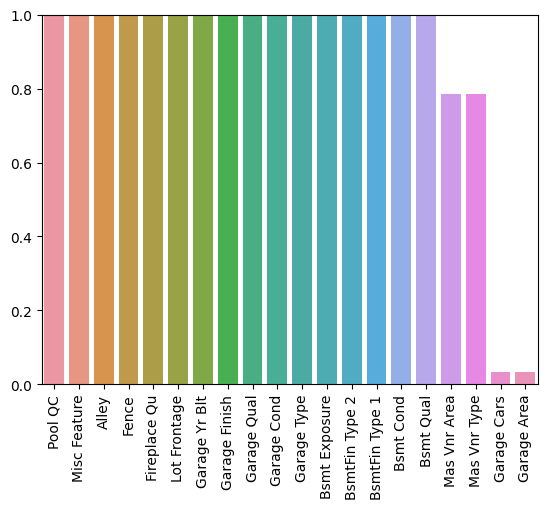

In [72]:
percent_of_nan_in_each_feature = percent_missing(df)

sns.barplot(x = percent_of_nan_in_each_feature.index, y=percent_of_nan_in_each_feature)
plt.xticks(rotation=90);
plt.ylim(0,1);

In [73]:
df[df['Garage Area'].isnull()]

,Unnamed: 0,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2232,2236,2237,910201180,70,RM,50.0,9060,Pave,NaN,Reg,...,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca,150909


In [74]:
df[df['Garage Cars'].isnull()]

,Unnamed: 0,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2232,2236,2237,910201180,70,RM,50.0,9060,Pave,NaN,Reg,...,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca,150909


Garage Area and Garage Cars have same missing row.

Let's missing them. 

In [75]:
df = df.dropna(axis = 0, subset = ['Garage Area', 'Garage Cars'])

Now, all 1% are dropped. 

Let's assure it.

In [76]:
percent_of_nan_in_each_feature = percent_missing(df)

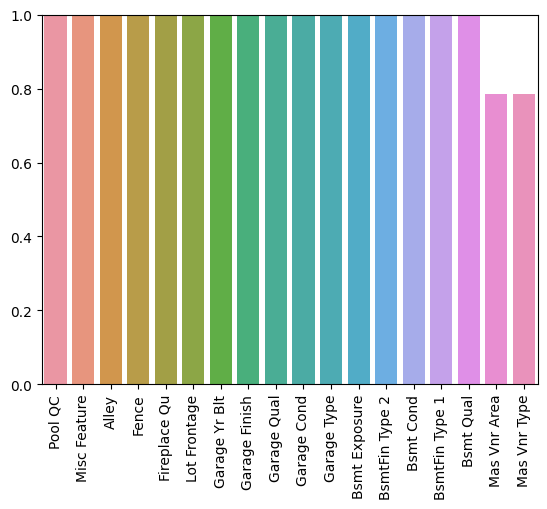

In [77]:
sns.barplot(x = percent_of_nan_in_each_feature.index, y=percent_of_nan_in_each_feature)
plt.xticks(rotation=90);
plt.ylim(0,1);

Now all features which has less than 1% missing values are gone.

Now let's focus on next features which have more than 1% missing values i.e. Mas Vnr Area and Mas Vnr Type.

In [79]:
df[df['Mas Vnr Area'].isnull()]

,Unnamed: 0,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
55,55,56,528240070,60,RL,NaN,7851,Pave,NaN,Reg,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,216500
484,484,485,528275160,60,RL,NaN,12891,Pave,NaN,IR1,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,257500
517,517,518,528458020,20,FV,90.0,7993,Pave,NaN,IR1,...,0,NaN,NaN,NaN,0,10,2009,New,Partial,225000
538,538,539,531371050,20,RL,67.0,10083,Pave,NaN,Reg,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,184900
867,867,868,907260030,60,RL,70.0,8749,Pave,NaN,Reg,...,0,NaN,NaN,NaN,0,11,2009,WD,Normal,198500
1095,1095,1096,528290090,60,RL,NaN,7750,Pave,NaN,Reg,...,0,NaN,NaN,NaN,0,4,2008,WD,Normal,176000
1119,1119,1120,528439010,20,RL,87.0,10037,Pave,NaN,Reg,...,0,NaN,NaN,NaN,0,8,2008,WD,Normal,247000
1122,1122,1123,528462040,20,FV,95.0,11639,Pave,NaN,Reg,...,0,NaN,NaN,NaN,0,12,2008,New,Partial,182000
1127,1127,1128,528480160,60,FV,65.0,8125,Pave,NaN,Reg,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,205950
1183,1184,1185,534104100,60,FV,NaN,7500,Pave,NaN,Reg,...,0,NaN,NaN,NaN,0,4,2008,WD,Normal,205000


In [80]:
df[df['Mas Vnr Type'].isnull()]

,Unnamed: 0,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
55,55,56,528240070,60,RL,NaN,7851,Pave,NaN,Reg,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,216500
484,484,485,528275160,60,RL,NaN,12891,Pave,NaN,IR1,...,0,NaN,NaN,NaN,0,7,2009,WD,Normal,257500
517,517,518,528458020,20,FV,90.0,7993,Pave,NaN,IR1,...,0,NaN,NaN,NaN,0,10,2009,New,Partial,225000
538,538,539,531371050,20,RL,67.0,10083,Pave,NaN,Reg,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,184900
867,867,868,907260030,60,RL,70.0,8749,Pave,NaN,Reg,...,0,NaN,NaN,NaN,0,11,2009,WD,Normal,198500
1095,1095,1096,528290090,60,RL,NaN,7750,Pave,NaN,Reg,...,0,NaN,NaN,NaN,0,4,2008,WD,Normal,176000
1119,1119,1120,528439010,20,RL,87.0,10037,Pave,NaN,Reg,...,0,NaN,NaN,NaN,0,8,2008,WD,Normal,247000
1122,1122,1123,528462040,20,FV,95.0,11639,Pave,NaN,Reg,...,0,NaN,NaN,NaN,0,12,2008,New,Partial,182000
1127,1127,1128,528480160,60,FV,65.0,8125,Pave,NaN,Reg,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,205950
1183,1184,1185,534104100,60,FV,NaN,7500,Pave,NaN,Reg,...,0,NaN,NaN,NaN,0,4,2008,WD,Normal,205000


Again! Same rows.

It shows masnory veneer type and area outside the house. They have more than 20 missing rows. So lets just fill them with zero instead of dropping as that would be a loss.

In [81]:
masn_cols = ['Mas Vnr Area', 'Mas Vnr Type']

df[masn_cols] = df[masn_cols].fillna(0)

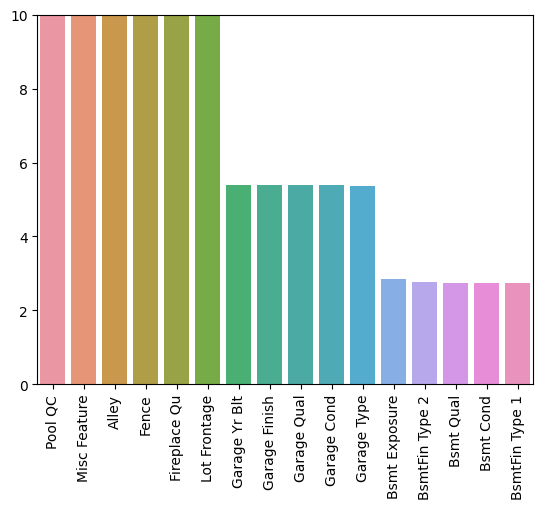

In [85]:
percent_of_nan_in_each_feature = percent_missing(df)
sns.barplot(x = percent_of_nan_in_each_feature.index, y=percent_of_nan_in_each_feature)
plt.xticks(rotation=90)
plt.ylim(0,10);

Now we can see there are alot of more Bsmt (basement) features that have missing values. I believe its better to set those all missing values as 0 (if the feature has numerical value) and 'None' if the feature has string values to show that this house has no this basement. Lets check the type of these all basement features left over.

In [87]:
df[['BsmtFin Type 1', 'Bsmt Cond', 'Bsmt Qual', 'BsmtFin Type 2', 'Bsmt Exposure']]

,BsmtFin Type 1,Bsmt Cond,Bsmt Qual,BsmtFin Type 2,Bsmt Exposure
0,BLQ,Gd,TA,Unf,Gd
1,Rec,TA,TA,LwQ,No
2,ALQ,TA,TA,Unf,No
3,ALQ,TA,TA,Unf,No
4,GLQ,TA,Gd,Unf,No
...,...,...,...,...,...
2921,GLQ,TA,TA,Unf,Av
2922,BLQ,TA,Gd,ALQ,Av
2923,GLQ,TA,Gd,Unf,Av
2924,ALQ,TA,Gd,LwQ,Av


All these features are string. So replace their missing values with 'None.'

In [88]:
bsmt_string_cols = ['BsmtFin Type 1', 'Bsmt Cond', 'Bsmt Qual', 'BsmtFin Type 2', 'Bsmt Exposure']

df[bsmt_string_cols] = df[bsmt_string_cols].fillna('None')

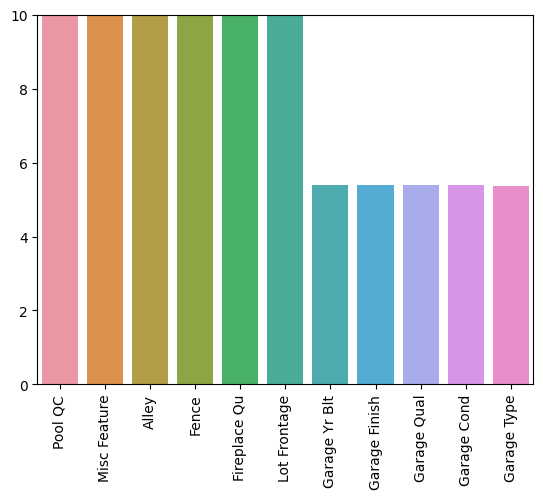

In [89]:
percent_of_nan_in_each_feature = percent_missing(df)
sns.barplot(x = percent_of_nan_in_each_feature.index, y=percent_of_nan_in_each_feature)
plt.xticks(rotation=90)
plt.ylim(0,10);

# **Fixing Missing Data of Columns WITH HIGH MISSING VALUES**

We have already delt with features that have missing values < 1%.

Now we have features that have too much missing data. So to handle it, we can adopt any of the following way:

**1. Drop that column:** Because its tiring and long process to firstly identify that with what value to fill it. So better to drop it. But we will potentially lose too much data. 


**2. Filling missing data:** Its good to fill the data but we can change the ground truth of the data if we fill with wrong estimation.

    * Simple case: fill with zero
    * Harder case: Fill with some statistical value




Let's firstly handle all the Garage values. Lets check if these are string values so replace missing values with None otherwise 0 by assuming that the house has garage or it doesn't has garage.

In [91]:
df[['Garage Cond', 'Garage Type', 'Garage Qual', 'Garage Finish', 'Garage Yr Blt']]

,Garage Cond,Garage Type,Garage Qual,Garage Finish,Garage Yr Blt
0,TA,Attchd,TA,Fin,1960.0
1,TA,Attchd,TA,Unf,1961.0
2,TA,Attchd,TA,Unf,1958.0
3,TA,Attchd,TA,Fin,1968.0
4,TA,Attchd,TA,Fin,1997.0
...,...,...,...,...,...
2921,TA,Detchd,TA,Unf,1984.0
2922,TA,Attchd,TA,Unf,1983.0
2923,NaN,NaN,NaN,NaN,NaN
2924,TA,Attchd,TA,RFn,1975.0


Ufff 2924 rows.

Its better to not drop them. Just fill string columns with 'None' and with 0 for numerical columns.

In [92]:
garage_string_cols = ['Garage Cond', 'Garage Type', 'Garage Qual', 'Garage Finish']
garage_num_cols = ['Garage Yr Blt']

df[garage_string_cols] = df[garage_string_cols].fillna('None')
df[garage_num_cols] = df[garage_num_cols].fillna(0)

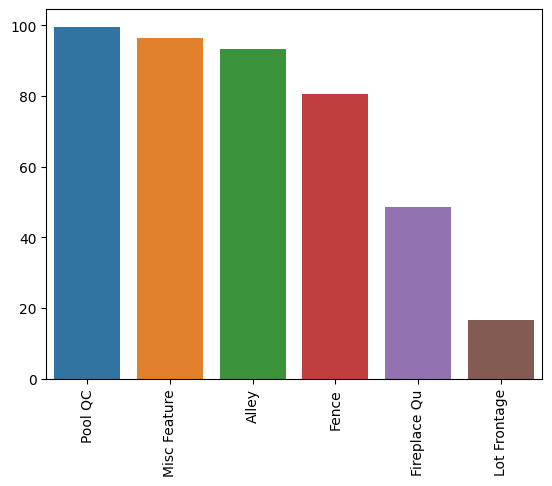

In [94]:
percent_of_nan_in_each_feature = percent_missing(df)
sns.barplot(x = percent_of_nan_in_each_feature.index, y=percent_of_nan_in_each_feature)
plt.xticks(rotation=90);

Now we are left with 6 more columns. Its better to drop 'Fence', 'Alley', 'Misc Feature', 'Pool QC' because they are missing too much data.

In [95]:
df = df.drop(['Fence', 'Alley', 'Misc Feature', 'Pool QC'], axis = 1)

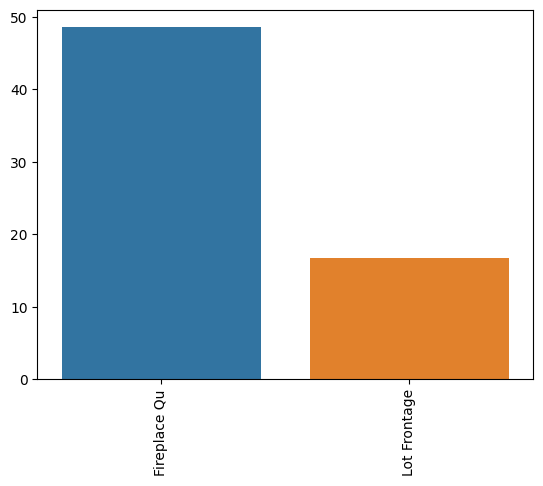

In [96]:
percent_of_nan_in_each_feature = percent_missing(df)
sns.barplot(x = percent_of_nan_in_each_feature.index, y=percent_of_nan_in_each_feature)
plt.xticks(rotation=90);

Now, we can't drop these features and can't simply fill them with 0 or none.

In [97]:
df['Fireplace Qu'].value_counts()

Gd    740
TA    600
Fa     75
Po     46
Ex     43
Name: Fireplace Qu, dtype: int64

In [99]:
df['Fireplace Qu'].isnull().sum()

1420

In [100]:
df['Fireplace Qu'] = df['Fireplace Qu'].fillna('None')

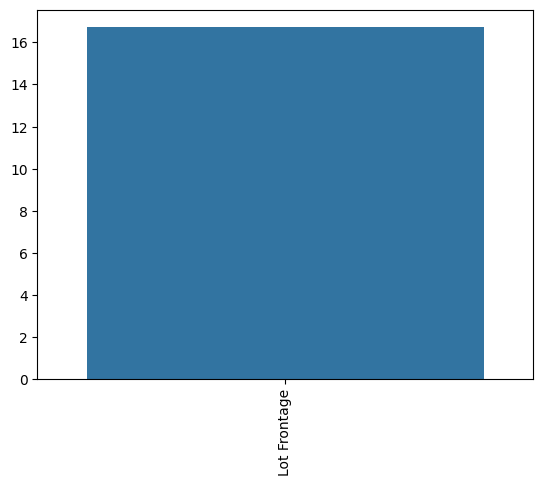

In [101]:
percent_of_nan_in_each_feature = percent_missing(df)
sns.barplot(x = percent_of_nan_in_each_feature.index, y=percent_of_nan_in_each_feature)
plt.xticks(rotation=90);

In [102]:
df['Lot Frontage'].value_counts()

60.0     276
80.0     137
70.0     133
50.0     116
75.0     105
        ... 
119.0      1
137.0      1
25.0       1
152.0      1
133.0      1
Name: Lot Frontage, Length: 128, dtype: int64

It is numerical feature.

In [103]:
df['Lot Frontage']

0       141.0
1        80.0
2        81.0
3        93.0
4        74.0
        ...  
2921     37.0
2922      NaN
2923     62.0
2924     77.0
2925     74.0
Name: Lot Frontage, Length: 2924, dtype: float64

It has NaN values so we cant fill it easily with 0. Let's use some statistical estimated value for it.

Lot Frontage is linear feet of street connected to property. So for it, neighbourhood matters alot. So, lets fill it will mean value, calculated from neighbourhood points.

In [107]:
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda value: value.fillna(value.mean()))

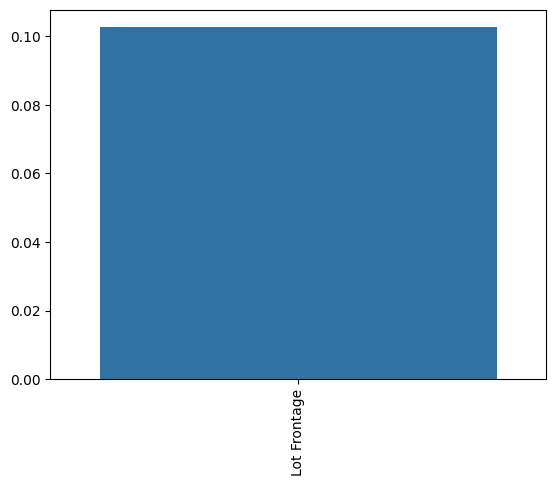

In [108]:
percent_of_nan_in_each_feature = percent_missing(df)
sns.barplot(x = percent_of_nan_in_each_feature.index, y=percent_of_nan_in_each_feature)
plt.xticks(rotation=90);

Bruh! It was having NaN values that didnt get fill. Lets fill them with 0.

In [109]:
df['Lot Frontage'] = df['Lot Frontage'].fillna(0)

In [110]:
percent_of_nan_in_each_feature = percent_missing(df)
sns.barplot(x = percent_of_nan_in_each_feature.index, y=percent_of_nan_in_each_feature)
plt.xticks(rotation=90);

ValueError: ignored

Woahhhhh!!!! All missing values gone.